In [2]:
import pandas as pd
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql.functions import when
from pyspark.sql.functions import col, sum, count

In [3]:
spark = SparkSession.builder.master('local[4]').appName('ml').getOrCreate()

In [4]:
pd.pandas.set_option('display.max_columns',None)

### Bank Full (dataset-1)

In [12]:
bank_full = spark.read.csv('bank-full.csv',sep=';',header=True,inferSchema=True)

In [13]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
bank_full.show(5)

+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician| single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar|married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown| single|  unknown|     no|      1|     no|  no|unknown|  5|  may|     19

In [14]:
bank_full.count()

45211

In [15]:
display(bank_full.limit(5))

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
bank_full.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [17]:
new_cols = ["emp_var_rate", "cons_price_idx", "cons_conf_idx", "euribor_3m", "nr_employed"]
for column in new_cols:
    bank_full = bank_full.withColumn(column, bank_full["poutcome"])

In [18]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
bank_full.show(5)

+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+------------+--------------+-------------+----------+-----------+
|age|         job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|emp_var_rate|cons_price_idx|cons_conf_idx|euribor_3m|nr_employed|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+------------+--------------+-------------+----------+-----------+
| 58|  management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|     unknown|       unknown|      unknown|   unknown|    unknown|
| 44|  technician| single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|     unknown|       unknown|      unknown|   unknown|    unknown|
| 33|entrepreneur|married

In [19]:
display(bank_full.limit(5))

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,unknown,unknown,unknown,unknown,unknown
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,unknown,unknown,unknown,unknown,unknown
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,unknown,unknown,unknown,unknown,unknown
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,unknown,unknown,unknown,unknown,unknown
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,unknown,unknown,unknown,unknown,unknown


In [21]:
from pyspark.sql.types import IntegerType

In [22]:
#new_data = bank_full

### Index mapper

In [23]:
def map_index(new_data):

    index_2008 = {"may":{"emp_var_rate":1.1, "cons_price_idx":93.994, "cons_conf_idx":-36.4, "euribor_3m":4.85, "nr_employed":5191},
                 "jun":{"emp_var_rate":1.4, "cons_price_idx":94.465, "cons_conf_idx":-41.8, "euribor_3m":4.86, "nr_employed":5228.1},
                 "jul":{"emp_var_rate":1.4, "cons_price_idx":93.918, "cons_conf_idx":-42.7, "euribor_3m":4.96, "nr_employed":5228.1},
                 "aug":{"emp_var_rate":1.4, "cons_price_idx":93.444, "cons_conf_idx":-36.1, "euribor_3m":4.965, "nr_employed":5228.1},
                 "oct":{"emp_var_rate":-0.1, "cons_price_idx":93.798, "cons_conf_idx":-40.4, "euribor_3m":5, "nr_employed":5195.8},
                 "nov":{"emp_var_rate":-0.1, "cons_price_idx":93.2, "cons_conf_idx":-42, "euribor_3m":4.406, "nr_employed":5195.8},
                 "dec":{"emp_var_rate":-0.2, "cons_price_idx":92.75, "cons_conf_idx":-45.9, "euribor_3m":3.563, "nr_employed":5176.3}}

    index_2009 = {"jan":{"emp_var_rate":-0.2, "nr_employed":5176.3},
                  "feb":{"emp_var_rate":-0.2, "nr_employed":5176.3},
                  "mar":{"emp_var_rate":-1.8, "cons_price_idx":92.84, "cons_conf_idx":-50, "euribor_3m":1.811, "nr_employed":5099.1},
                  "apr":{"emp_var_rate":-1.8, "cons_price_idx":93.075, "cons_conf_idx":-47.1, "euribor_3m":1.498, "nr_employed":5099.1},
                  "may":{"emp_var_rate":-1.8, "cons_price_idx":92.89, "cons_conf_idx":-46.2, "euribor_3m":1.334, "nr_employed":5099.1},
                 "jun":{"emp_var_rate":-2.9, "cons_price_idx":92.963, "cons_conf_idx":-40.8, "euribor_3m":1.26, "nr_employed":5076.2},
                 "jul":{"emp_var_rate":-2.9, "cons_price_idx":93.469, "cons_conf_idx":-33.6, "euribor_3m":1.072, "nr_employed":5076.2},
                 "aug":{"emp_var_rate":-2.9, "cons_price_idx":92.201, "cons_conf_idx":-31.4, "euribor_3m":0.884, "nr_employed":5076.2},
                 "sep":{"emp_var_rate":-3.4, "cons_price_idx":92.379, "cons_conf_idx":-29.8, "euribor_3m":0.813, "nr_employed":5017.5},
                 "oct":{"emp_var_rate":-3.4, "cons_price_idx":92.431, "cons_conf_idx":-26.9, "euribor_3m":0.754, "nr_employed":5017.5},
                 "nov":{"emp_var_rate":-3.4, "cons_price_idx":92.649, "cons_conf_idx":-30.1, "euribor_3m":0.722, "nr_employed":5017.5},
                 "dec":{"emp_var_rate":-3, "cons_price_idx":92.713, "cons_conf_idx":-33, "euribor_3m":0.718, "nr_employed":5023.5}}

    index_2010 = {"jan":{"emp_var_rate":-3, "nr_employed":5023.5},
                  "feb":{"emp_var_rate":-3, "nr_employed":5023.5},
                   "mar":{"emp_var_rate":-1.8, "cons_price_idx":92.369, "cons_conf_idx":-34.8, "euribor_3m":0.655, "nr_employed":5008.7},
                  "apr":{"emp_var_rate":-1.8, "cons_price_idx":93.749, "cons_conf_idx":-34.6, "euribor_3m":0.64, "nr_employed":5008.7},
                  "may":{"emp_var_rate":-1.8, "cons_price_idx":93.876, "cons_conf_idx":-40, "euribor_3m":0.668, "nr_employed":5008.7},
                 "jun":{"emp_var_rate":-1.7, "cons_price_idx":94.055, "cons_conf_idx":-39.8, "euribor_3m":0.704, "nr_employed":4991.6},
                 "jul":{"emp_var_rate":-1.7, "cons_price_idx":94.215, "cons_conf_idx":-40.3, "euribor_3m":0.79, "nr_employed":4991.6},
                 "aug":{"emp_var_rate":-1.7, "cons_price_idx":94.027, "cons_conf_idx":-38.3, "euribor_3m":0.898, "nr_employed":4991.6},
                 "sep":{"emp_var_rate":-1.1, "cons_price_idx":94.199, "cons_conf_idx":-37.5, "euribor_3m":0.886, "nr_employed":4963.6},
                 "oct":{"emp_var_rate":-1.1, "cons_price_idx":94.601, "cons_conf_idx":-49.5, "euribor_3m":0.959, "nr_employed":4963.6},
                 "nov":{"emp_var_rate":-1.1, "cons_price_idx":94.767, "cons_conf_idx":-50.8, "euribor_3m":1.05, "nr_employed":4963.6}}

    indx = [index_2008, index_2009, index_2010]
    years = [2008, 2009, 2010]
    
    for i in range(len(years)):
        for months, indexes in indx[i].items():
            for index, index_val in indexes.items():
                new_data = new_data.withColumn(index, 
                    when((col('year') == years[i]) & (col('month') == months), index_val).otherwise(col(index))) 
    return new_data

In [24]:
bank_full = map_index(new_data = bank_full)
bank_full.show(5)

AnalysisException: Column 'year' does not exist. Did you mean one of the following? [day, loan, y, age, job, pdays, default, month, balance, contact, marital, campaign, duration, housing, previous, education, poutcome, euribor_3m, emp_var_rate, nr_employed, cons_conf_idx, cons_price_idx];
'Project [age#61, job#62, marital#63, education#64, default#65, balance#66, housing#67, loan#68, contact#69, day#70, month#71, duration#72, campaign#73, pdays#74, previous#75, poutcome#76, y#77, CASE WHEN (('year = 2008) AND (month#71 = may)) THEN 1.1 ELSE emp_var_rate#376 END AS emp_var_rate#823, cons_price_idx#395, cons_conf_idx#415, euribor_3m#436, nr_employed#458]
+- Project [age#61, job#62, marital#63, education#64, default#65, balance#66, housing#67, loan#68, contact#69, day#70, month#71, duration#72, campaign#73, pdays#74, previous#75, poutcome#76, y#77, emp_var_rate#376, cons_price_idx#395, cons_conf_idx#415, euribor_3m#436, poutcome#76 AS nr_employed#458]
   +- Project [age#61, job#62, marital#63, education#64, default#65, balance#66, housing#67, loan#68, contact#69, day#70, month#71, duration#72, campaign#73, pdays#74, previous#75, poutcome#76, y#77, emp_var_rate#376, cons_price_idx#395, cons_conf_idx#415, poutcome#76 AS euribor_3m#436]
      +- Project [age#61, job#62, marital#63, education#64, default#65, balance#66, housing#67, loan#68, contact#69, day#70, month#71, duration#72, campaign#73, pdays#74, previous#75, poutcome#76, y#77, emp_var_rate#376, cons_price_idx#395, poutcome#76 AS cons_conf_idx#415]
         +- Project [age#61, job#62, marital#63, education#64, default#65, balance#66, housing#67, loan#68, contact#69, day#70, month#71, duration#72, campaign#73, pdays#74, previous#75, poutcome#76, y#77, emp_var_rate#376, poutcome#76 AS cons_price_idx#395]
            +- Project [age#61, job#62, marital#63, education#64, default#65, balance#66, housing#67, loan#68, contact#69, day#70, month#71, duration#72, campaign#73, pdays#74, previous#75, poutcome#76, y#77, poutcome#76 AS emp_var_rate#376]
               +- Relation [age#61,job#62,marital#63,education#64,default#65,balance#66,housing#67,loan#68,contact#69,day#70,month#71,duration#72,campaign#73,pdays#74,previous#75,poutcome#76,y#77] csv


### Bank Full Dataset (dataset-2)

In [ ]:
bank_add_full = spark.read.csv('bank-additional-full.csv', header=True, inferSchema=True)

In [ ]:
bank_add_full.show(5)

### replace values from 999 to -1

In [ ]:
bank_add_full = bank_add_full.withColumn("pdays", when(col("pdays") == 999, -1).otherwise(col("pdays")))

### Renaming columns names and values

In [ ]:
old_col_list = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
for i in range(0, len(old_col_list)):
    bank_add_full = bank_add_full.withColumnRenamed(old_col_list[i], new_cols[i])

In [ ]:
old_edu = ["basic.4y", "high.school", "basic.6y", "basic.9y", "university.degree", "professional.course"]
new_edu = ["basic_4y", "high_school", "basic_6y", "basic_9y", "university_degree" ,"professional_course"]

for i in range(0,6):
    bank_add_full = bank_add_full.withColumn("education", when(col("education") == old_edu[i], new_edu[i]).otherwise(col("education")))

In [ ]:
bank_full = bank_full.drop("balance", "day")

In [ ]:
bank_add_full = bank_add_full.drop("day_of_week")

## Concat two dataframes

In [ ]:
bank_data = bank_add_full.union(bank_full)

In [ ]:
bank_data.count()

In [ ]:
bank_data.summary()

In [ ]:
cat_col = ["job","marital","education","default","housing","loan","contact","month","year","y"]
cont_col = ["age","duration","campaign","pdays","previous","emp_var_rate","cons_price_idx","cons_conf_idx","euribor_3m","nr_employed"]
categories = bank_data.select(cat_col)
continuous = bank_data.select(cont_col)

### value counts

In [ ]:
for columns in categories:
    print("Column Name", columns)
    print("-----------------------")
    counts = bank_data.groupBy(columns).count()
    counts.show()
    print("     ")
    print("******************************************************")
    print("     ")

In [ ]:
bank_data = bank_data.withColumn("job", when(col("job") == "admin.", "admin").otherwise(col("job")))

In [ ]:
counts = bank_data.groupBy("job").count()
counts.show()

In [ ]:
for column in bank_data.columns:
    bank_data = bank_data.withColumn(column, when(col(column).isin("unknown", "nonexistent"), None).otherwise(col(column)))

In [ ]:
bank_data.show(5)

### Checking for null values

In [ ]:
bank_data.agg(*[count(when(col(c).isNull(), c)).alias(c) for c in categories.columns]).show()

In [ ]:
bank_data.agg(*[count(when(col(c).isNull(), c)).alias(c) for c in continuous.columns]).show()

### Replacing continue variables

In [ ]:
from pyspark.sql.functions import mean

# calculate the mean of non-null values in columns col1 and col2
mean_dict = bank_data.select(*(mean(c).alias(c) for c in cont_col)).first().asDict()

# replace null values with the mean in columns col1 and col2
bank_data = bank_data.fillna(mean_dict)

In [ ]:
bank_data.agg(*[count(when(col(c).isNull(), c)).alias(c) for c in continuous.columns]).show()

### Replacing categorical variables

In [ ]:
bank_data = bank_data.drop("poutcome")

In [ ]:
for column in cat_col:
    mode_value = bank_data.first()[column]
    bank_data = bank_data.fillna({column:mode_value})

In [ ]:
bank_data.agg(*[count(when(col(c).isNull(), c)).alias(c) for c in categories.columns]).show()

In [ ]:
bank_data.show()

In [ ]:
pdf=bank_data.toPandas()

In [ ]:
#pdf.to_csv("./concat_.csv")

In [ ]:
correlation = pdf.corr()
sns.heatmap(correlation)

## Data Preprocessing

In [ ]:
# Creating a dictionary for converting categorical textual data entries
# into categorical numeric on basis of job profile
job_dict = {"entrepreneur":11, "self-employed":10, "admin":9, "management":8, "services":7, 
       "technician":6, "blue-collar":5, "housemaid":4, "retired":3, "student":2, "unemployed":1}

for key, value in job_dict.items():
    bank_data = bank_data.withColumn("job", when(bank_data["job"] == key, value).otherwise(bank_data["job"]))

In [ ]:
marital_dict = {"married":3, "single":2, "divorced":1}

for key, value in marital_dict.items():
    bank_data = bank_data.withColumn("marital", when(bank_data["marital"] == key, value).otherwise(bank_data["marital"]))

In [ ]:
edu_dict = {"professional_course":10, "university_degree":9, "tertiary":8, "secondary":7, 
       "high_school":6, "basic_9y":5, "basic_6y":4, "primary":3, "basic_4y":2, "illiterate":1}

for key, value in edu_dict.items():
    bank_data = bank_data.withColumn("education", when(bank_data["education"] == key, value).otherwise(bank_data["education"]))

In [ ]:
y_dict = {"yes":1, "no":0}

for key, value in y_dict.items():
    bank_data = bank_data.withColumn("y", when(bank_data["y"] == key, value).otherwise(bank_data["y"]))

contact_dict = {"telephone":1, "cellular":0}

for key, value in contact_dict.items():
    bank_data = bank_data.withColumn("contact", when(bank_data["contact"] == key, value).otherwise(bank_data["contact"]))

In [ ]:
bank_data.show(5)

In [ ]:
quarter_dict = {"jan":"Q1", "feb":"Q1", "mar":"Q1", "apr":"Q2", "may":"Q2", "jun":"Q2", 
                "jul":"Q3", "aug":"Q3", "sep":"Q3", "oct":"Q4", "nov":"Q4", "dec":"Q4"}

for key, value in quarter_dict.items():
    bank_data = bank_data.withColumn("month", when(bank_data["month"] == key, value).otherwise(bank_data["month"]))

In [ ]:
one_hot_cols = ["default", "housing", "month", "loan", "contact"]

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.sql.functions import col

def one_hot_encode(data, columns):
    new_data = data.select("*")
    for col_name in columns:
        indexer = StringIndexer(inputCol=col_name, outputCol=f"{col_name}_index")
        new_data = indexer.fit(new_data).transform(new_data)

        encoder = OneHotEncoder(inputCols=[f"{col_name}_index"], outputCols=[f"{col_name}_one_hot"], dropLast=True)
        new_data = encoder.fit(new_data).transform(new_data)

        new_data = new_data.drop(col_name).drop(f"{col_name}_index")

    return new_data

In [ ]:
tele_sdf_ohe = one_hot_encode(data = bank_data, columns = one_hot_cols[:-1])

In [ ]:
tele_sdf_ohe.show(5)

## Outliers

In [ ]:
out = bank_data.toPandas()

In [31]:
outliers_columns = ["age","duration","campaign","pdays","previous"]

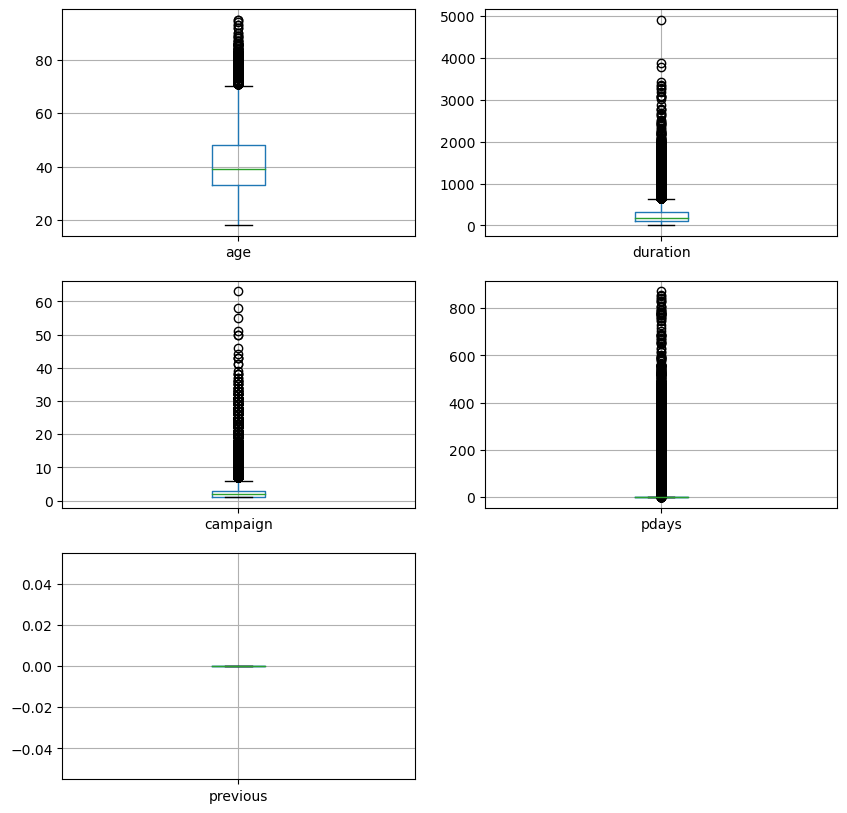

In [47]:
def plot_box():
    plt.figure(figsize = (10,10))
    plt.subplot(3,2,1)
    out.boxplot(column = ["age"])

    plt.subplot(3,2,2)
    out.boxplot(column = ["duration"])

    plt.subplot(3,2,3)
    out.boxplot(column = ["campaign"])

    plt.subplot(3,2,4)
    out.boxplot(column = ["pdays"])
    
    plt.subplot(3,2,5)
    out.boxplot(column=["previous"])
           
plot_box()





In [29]:
# assume that 'df' is your DataFrame and 'column' is the column for which to compute the quantiles
quantiles = bank_full.approxQuantile("age", [0.25, 0.5, 0.75], 0.01)

# print the quartiles
print("for age")
print("25th percentile:", quantiles[0])
print("50th percentile:", quantiles[1])
print("75th percentile:", quantiles[2])


for age
25th percentile: 33.0
50th percentile: 39.0
75th percentile: 48.0


In [43]:
max_out_limit = []
outliers_columns = ["age","duration","campaign","pdays","previous"]
for cols in outliers_columns:
    quantiles = bank_full.approxQuantile(cols, [0.25, 0.5, 0.75], 0.01)
    
    q3 = quantiles[2]
    q1 = quantiles[0]
    iqr = q3 - q1
    iqr = iqr*1.5
    max_limit = q3 + iqr
    min_limit = q1 - iqr
    max_out_limit.append(max_limit)
    
    print(cols, "\t max_limit: \t",max_limit,"\t min_limit: ",min_limit)
else:
    print(80*'-')
    print(max_out_limit)


age 	 max_limit: 	 70.5 	 min_limit:  10.5
duration 	 max_limit: 	 630.5 	 min_limit:  -213.5
campaign 	 max_limit: 	 6.0 	 min_limit:  -2.0
pdays 	 max_limit: 	 -1.0 	 min_limit:  -1.0
previous 	 max_limit: 	 0.0 	 min_limit:  0.0
--------------------------------------------------------------------------------
[70.5, 630.5, 6.0, -1.0, 0.0]


In [44]:
for i, j in zip(outliers_columns, max_out_limit):
    bank_data = bank_full.withColumn(i, 
                    when((col(i) >= j), j).otherwise(col(i))) 


In [45]:
out = bank_data.toPandas()

In [46]:
plot_box()

NameError: name 'plot_box' is not defined

In [ ]:
bank_data.show()

In [ ]:
from pyspark.ml.feature import StandardScaler

# assuming bank_data is your PySpark DataFrame
inputCols = bank_data.columns
outputCol = "scaledFeatures"

In [ ]:
for col in inputCols:
    scaler = StandardScaler(inputCol= col,
                            outputCol= "scaledFeatures")

    # fit the scaler to your data
    scalerModel = scaler.fit(bank_data)
    
    # transform your data using the scaler
    scaledData = scalerModel.transform(bank_data)